# Data cleaning and preprocessing 

In [7]:
import pandas as pd

# Specify the path to your CSV file
file_path = 'Group_2_Raw_Data.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

df.head()


,communityname,State,countyCode,communityCode,fold,pop,perHoush,pctBlack,pctWhite,pctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14.1,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


In [8]:
df.describe()

,fold,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,...,pctForeignBorn,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,popDensity,pctUsePubTrans,pctOfficDrugUnit,murders,murdPerPop
count,2215.000000,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,5.494357,5.311798e+04,2.707327,9.335102,83.979819,2.670203,7.950176,14.445837,27.644840,13.975142,...,7.340302,61.539630,51.538596,77.411079,88.111865,2783.835034,3.041124,0.980253,7.764921,5.859476
std,2.872924,2.046203e+05,0.334120,14.247156,16.419080,4.473843,14.589832,4.518623,6.181517,5.970747,...,8.418476,16.750061,10.517926,10.878186,7.287836,2828.993341,4.912917,2.877100,58.166451,9.156717
min,1.000000,1.000500e+04,1.600000,0.000000,2.680000,0.030000,0.120000,4.580000,9.380000,4.640000,...,0.180000,6.750000,11.830000,27.950000,32.830000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.436600e+04,2.500000,0.860000,76.320000,0.620000,0.930000,12.250000,24.415000,11.320000,...,2.060000,50.110000,44.995000,72.060000,85.200000,1181.900000,0.360000,0.000000,0.000000,0.000000
50%,5.000000,2.279200e+04,2.660000,2.870000,90.350000,1.230000,2.180000,13.620000,26.780000,12.540000,...,4.310000,64.490000,52.170000,79.490000,90.030000,2027.300000,1.220000,0.000000,1.000000,2.170000
75%,8.000000,4.302400e+04,2.850000,11.145000,96.225000,2.670000,7.810000,15.360000,29.205000,14.345000,...,9.250000,74.855000,58.740000,85.135000,93.010000,3321.700000,3.365000,0.000000,3.000000,8.365000
max,10.000000,7.322564e+06,5.280000,96.670000,99.630000,57.460000,95.290000,54.400000,70.510000,63.620000,...,60.400000,93.140000,78.560000,96.590000,99.900000,44229.900000,54.330000,48.440000,1946.000000,91.090000


In [9]:
import numpy as np

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)


In [10]:
# Summary table of columns with missing data
missing_summary = df.isnull().sum()[df.isnull().sum() > 0].to_frame('Missing Count')
missing_summary['Missing Percentage'] = (df.isnull().mean() * 100)[df.isnull().sum() > 0]
print(missing_summary)


                   Missing Count  Missing Percentage
countyCode                  1221           55.124153
communityCode               1224           55.259594
otherPerCap                    1            0.045147
numPolice                   1872           84.514673
policePerPop                1871           84.469526
policeField                 1871           84.469526
policeFieldPerPop           1871           84.469526
policeCalls                 1871           84.469526
policCallPerPop             1871           84.469526
policCallPerOffic           1871           84.469526
policePerPop2               1871           84.469526
racialMatch                 1871           84.469526
pctPolicWhite               1871           84.469526
pctPolicBlack               1871           84.469526
pctPolicHisp                1871           84.469526
pctPolicAsian               1871           84.469526
pctPolicMinority            1871           84.469526
officDrugUnits              1871           84.

In [11]:
# Define the list of ID columns
id_columns = ['communityname', 'State', 'countyCode', 'communityCode', 'fold']

# Separate ID columns from the DataFrame
df_id = df[id_columns]

# Remove ID columns to leave only features and targets
df_features_targets = df.drop(columns=id_columns)

# If needed, separate features and targets further
# Assuming targets start from column index 124
feature_columns = df_features_targets.columns[:124]  # Adjust if necessary
target_columns = df_features_targets.columns[124:]

# Separate features and targets
df_features = df_features_targets[feature_columns]
df_targets = df_features_targets[target_columns]


In [12]:
# Select the first 124 columns as feature columns
feature_columns = df_features_targets.columns[:124]
df_features = df_features_targets[feature_columns]

# Calculate the percentage of missing data in these feature columns
missing_percentage = df_features.isnull().mean() * 100

# Identify columns with more than 80% missing data
columns_to_drop = missing_percentage[missing_percentage > 80].index
print("Columns to drop due to high missing data:", columns_to_drop)

# Drop these columns from the feature DataFrame
df_features_cleaned = df_features.drop(columns=columns_to_drop)

# Display the remaining feature columns after dropping
print("Remaining feature columns:", df_features_cleaned.columns)


Columns to drop due to high missing data: Index(['numPolice', 'policePerPop', 'policeField', 'policeFieldPerPop',
       'policeCalls', 'policCallPerPop', 'policCallPerOffic', 'policePerPop2',
       'racialMatch', 'pctPolicWhite', 'pctPolicBlack', 'pctPolicHisp',
       'pctPolicAsian', 'pctPolicMinority', 'officDrugUnits',
       'numDiffDrugsSeiz', 'policAveOT', 'policCarsAvail', 'policOperBudget',
       'pctPolicPatrol', 'gangUnit', 'policBudgetPerPop'],
      dtype='object')
Remaining feature columns: Index(['pop', 'perHoush', 'pctBlack', 'pctWhite', 'pctAsian', 'pctHisp',
       'pct12-21', 'pct12-29', 'pct16-24', 'pct65up',
       ...
       'persHomeless', 'pctForeignBorn', 'pctBornStateResid', 'pctSameHouse-5',
       'pctSameCounty-5', 'pctSameState-5', 'landArea', 'popDensity',
       'pctUsePubTrans', 'pctOfficDrugUnit'],
      dtype='object', length=102)


In [13]:
# Identify non-numeric columns in df_features_cleaned
non_numeric_features = df_features_cleaned.select_dtypes(exclude=['float', 'int']).columns

# Display the non-numeric columns and their data types
print("Non-numeric features and their data types:")
print(df_features_cleaned[non_numeric_features].dtypes)



Non-numeric features and their data types:
otherPerCap       object
pctNotSpeakEng    object
landArea          object
dtype: object


In [14]:
# Check the unique values in each column to understand the data
for column in non_numeric_features:
    print(f"Unique values in {column}:")
    print(df_features_cleaned[column].unique())
    print("\n")

# Attempt to convert to numeric, replacing non-convertible values with NaN to identify issues
for column in non_numeric_features:
    df_features_cleaned[column] = pd.to_numeric(df_features_cleaned[column], errors='coerce')

# Display the columns again to confirm if conversion was successful
print("Data types after conversion attempt:")
print(df_features_cleaned[non_numeric_features].dtypes)


Unique values in otherPerCap:
['5115' '5250' '5954' ... '8532' '4436' '7540']


Unique values in pctNotSpeakEng:
['1.37.1' '1.81' '1.14' '0.56' '0.39' '0.6' '0.28' '0.43' '2.51' '0.81'
 '10.8' '0.59' '0.54' '0.42' '0.69' '0.92' '15.46' '0.53' '2.2' '9.84'
 '4.31' '1.23' '0.75' '1.21' '3.17' '2.94' '0.18' '2.4' '21.64' '2.49'
 '0.24' '0.61' '3.08' '0.68' '2.25' '0.21' '1.64' '3.89' '0.45' '1.35'
 '0.31' '0.51' '0.85' '2.03' '14.64' '0.95' '4.86' '0.8' '2.63' '1.63'
 '0.7' '0.35' '0.44' '1.19' '0.67' '0.47' '0.49' '0.52' '0.48' '0.71'
 '1.53' '0.55' '1.15' '0.23' '0.29' '4.14' '1.0' '1.76' '1.02' '0.93'
 '0.13' '1.06' '3.21' '2.17' '2.59' '5.83' '0.84' '7.86' '0.76' '0.26'
 '0.3' '3.93' '1.1' '0.83' '1.26' '0.57' '3.07' '8.21' '1.99' '1.58'
 '1.48' '3.36' '0.15' '2.43' '0.25' '1.24' '5.43' '3.33' '0.73' '1.78'
 '0.19' '17.45' '16.23' '1.46' '0.17' '5.54' '1.01' '1.57' '1.28' '2.19'
 '1.31' '0.74' '1.41' '2.64' '30.91' '3.38' '0.64' '7.03' '1.04' '14.8'
 '2.02' '1.77' '0.32' '0.38' '0.08'

In [15]:
# Calculate the percentage of missing data in non-numeric feature columns
missing_percentage_non_numeric = df_features[non_numeric_features].isnull().mean() * 100

# Display the results
print("Percentage of missing data in non-numeric feature columns:")
print(missing_percentage_non_numeric)


Percentage of missing data in non-numeric feature columns:
otherPerCap       0.045147
pctNotSpeakEng    0.000000
landArea          0.000000
dtype: float64


In [16]:
# Identify non-numeric columns in df_targets
non_numeric_targets = df_targets.select_dtypes(exclude=['float', 'int']).columns
print("Non-numeric target columns:", non_numeric_targets)
# Convert non-numeric columns to numeric, forcing errors to NaN
"""
for column in non_numeric_targets:
    df_targets[column] = pd.to_numeric(df_targets[column], errors='coerce')
    """


Non-numeric target columns: Index(['rapes', 'rapesPerPop', 'robberies', 'robbbPerPop', 'assaults',
       'assaultPerPop', 'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop',
       'autoTheft', 'autoTheftPerPop', 'arsons', 'arsonsPerPop',
       'violentPerPop', 'nonViolPerPop'],
      dtype='object')


"\nfor column in non_numeric_targets:\n    df_targets[column] = pd.to_numeric(df_targets[column], errors='coerce')\n    "

# Impute missing df_id

In [17]:
# Calculate the percentage of missing values for each column in df_id
missing_percentage = df_id.isnull().mean() * 100

# Display the missing percentage for each ID column
print("Percentage of missing values in each ID column:\n", missing_percentage)


Percentage of missing values in each ID column:
 communityname     0.000000
State             0.000000
countyCode       55.124153
communityCode    55.259594
fold              0.000000
dtype: float64


In [18]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to categorical columns in df_id
for col in df_id.columns:
    if df_id[col].dtype == 'object':
        le = LabelEncoder()
        df_id.loc[:, col] = le.fit_transform(df_id[col].astype(str))



In [19]:
from sklearn.impute import KNNImputer
import pandas as pd

# Initialize the KNN imputer with the number of neighbors
knn_imputer = KNNImputer(n_neighbors=3)

# Perform KNN imputation
df_id_imputed = pd.DataFrame(knn_imputer.fit_transform(df_id), columns=df_id.columns)

# Verify that the missing values have been imputed
print("Missing values after KNN imputation:\n", df_id_imputed.isnull().sum())



Missing values after KNN imputation:
 communityname    0
State            0
countyCode       0
communityCode    0
fold             0
dtype: int64


# Inpute df_features_cleaned and df_targets

In [20]:
from sklearn.impute import SimpleImputer


# Separate numerical and categorical columns in df_features_cleaned
num_features = df_features_cleaned.select_dtypes(include=['float', 'int']).columns


# Mean imputation for numerical features
num_imputer = SimpleImputer(strategy='median')
df_features_cleaned[num_features] = num_imputer.fit_transform(df_features_cleaned[num_features])


# Check if there are any remaining missing values
print("Remaining missing values in df_features_cleaned:\n", df_features_cleaned.isnull().sum())


Remaining missing values in df_features_cleaned:
 pop                 0
perHoush            0
pctBlack            0
pctWhite            0
pctAsian            0
                   ..
pctSameState-5      0
landArea            0
popDensity          0
pctUsePubTrans      0
pctOfficDrugUnit    0
Length: 102, dtype: int64


In [21]:
# Impute missing values in the target variables using mean strategy
target_imputer = SimpleImputer(strategy='median')
df_targets= pd.DataFrame(target_imputer.fit_transform(df_targets), columns=df_targets.columns)

# Check if there are any remaining missing values
print("Remaining missing values in df_targets:\n", df_targets.isnull().sum())


Remaining missing values in df_targets:
 murders            0
murdPerPop         0
rapes              0
rapesPerPop        0
robberies          0
robbbPerPop        0
assaults           0
assaultPerPop      0
burglaries         0
burglPerPop        0
larcenies          0
larcPerPop         0
autoTheft          0
autoTheftPerPop    0
arsons             0
arsonsPerPop       0
violentPerPop      0
nonViolPerPop      0
dtype: int64


# Output the cleaned dataset

In [22]:

# Combine the DataFrames along columns
df_combined = pd.concat([df_id_imputed, df_features_cleaned, df_targets], axis=1)

# Output the combined DataFrame to a CSV file
df_combined.to_csv("Group_2_clean_Data..csv", index=False)

print("Data successfully saved to combined_output.csv")


Data successfully saved to combined_output.csv


 # Exploratory data analysis 

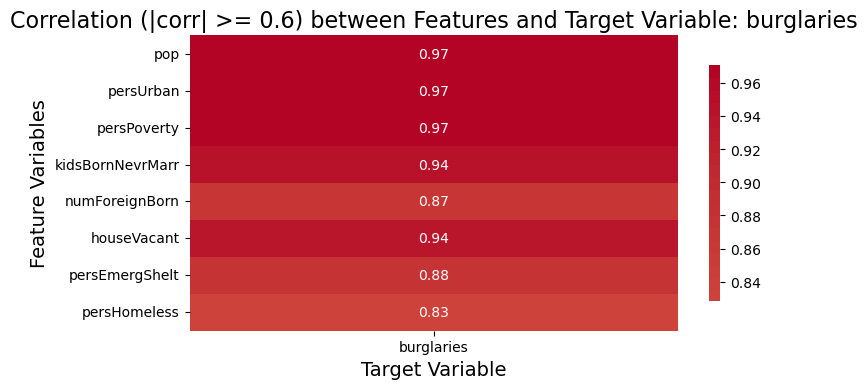

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Combine features and targets into one DataFrame to calculate correlations
df_combined = pd.concat([df_features_cleaned, df_targets], axis=1)

# Ensure 'violentPerPop' exists in the targets DataFrame
if 'burglaries' in df_targets.columns:
    # Calculate the correlation matrix for the combined DataFrame
    correlation_matrix = df_combined.corr()

    # Extract correlations between features and the specific target variable
    correlation_with_target = correlation_matrix['burglaries'][df_features_cleaned.columns]

    # Define a correlation threshold
    threshold = 0.6

    # Filter features based on the threshold
    filtered_correlations = correlation_with_target[correlation_with_target.abs() >= threshold]

    # Check if any features remain after filtering
    if filtered_correlations.empty:
        print(f"No features have correlation >= {threshold} with 'burglaries'.")
    else:
        # Plot the heatmap for filtered correlations
        plt.figure(figsize=(8, len(filtered_correlations) * 0.5))  # Adjust figure size dynamically

        sns.heatmap(
            filtered_correlations.to_frame(),
            annot=True,
            cmap="coolwarm",
            center=0,
            fmt=".2f",
            cbar_kws={"shrink": 0.8},
        )

        # Set titles and labels
        plt.title(
            f"Correlation (|corr| >= {threshold}) between Features and Target Variable: burglaries",
            fontsize=16,
        )
        plt.xlabel("Target Variable", fontsize=14)
        plt.ylabel("Feature Variables", fontsize=14)

        # Display the heatmap
        plt.tight_layout()
        plt.show()
else:
    print("The target variable 'burglaries' is not in df_targets. Please check your input data.")


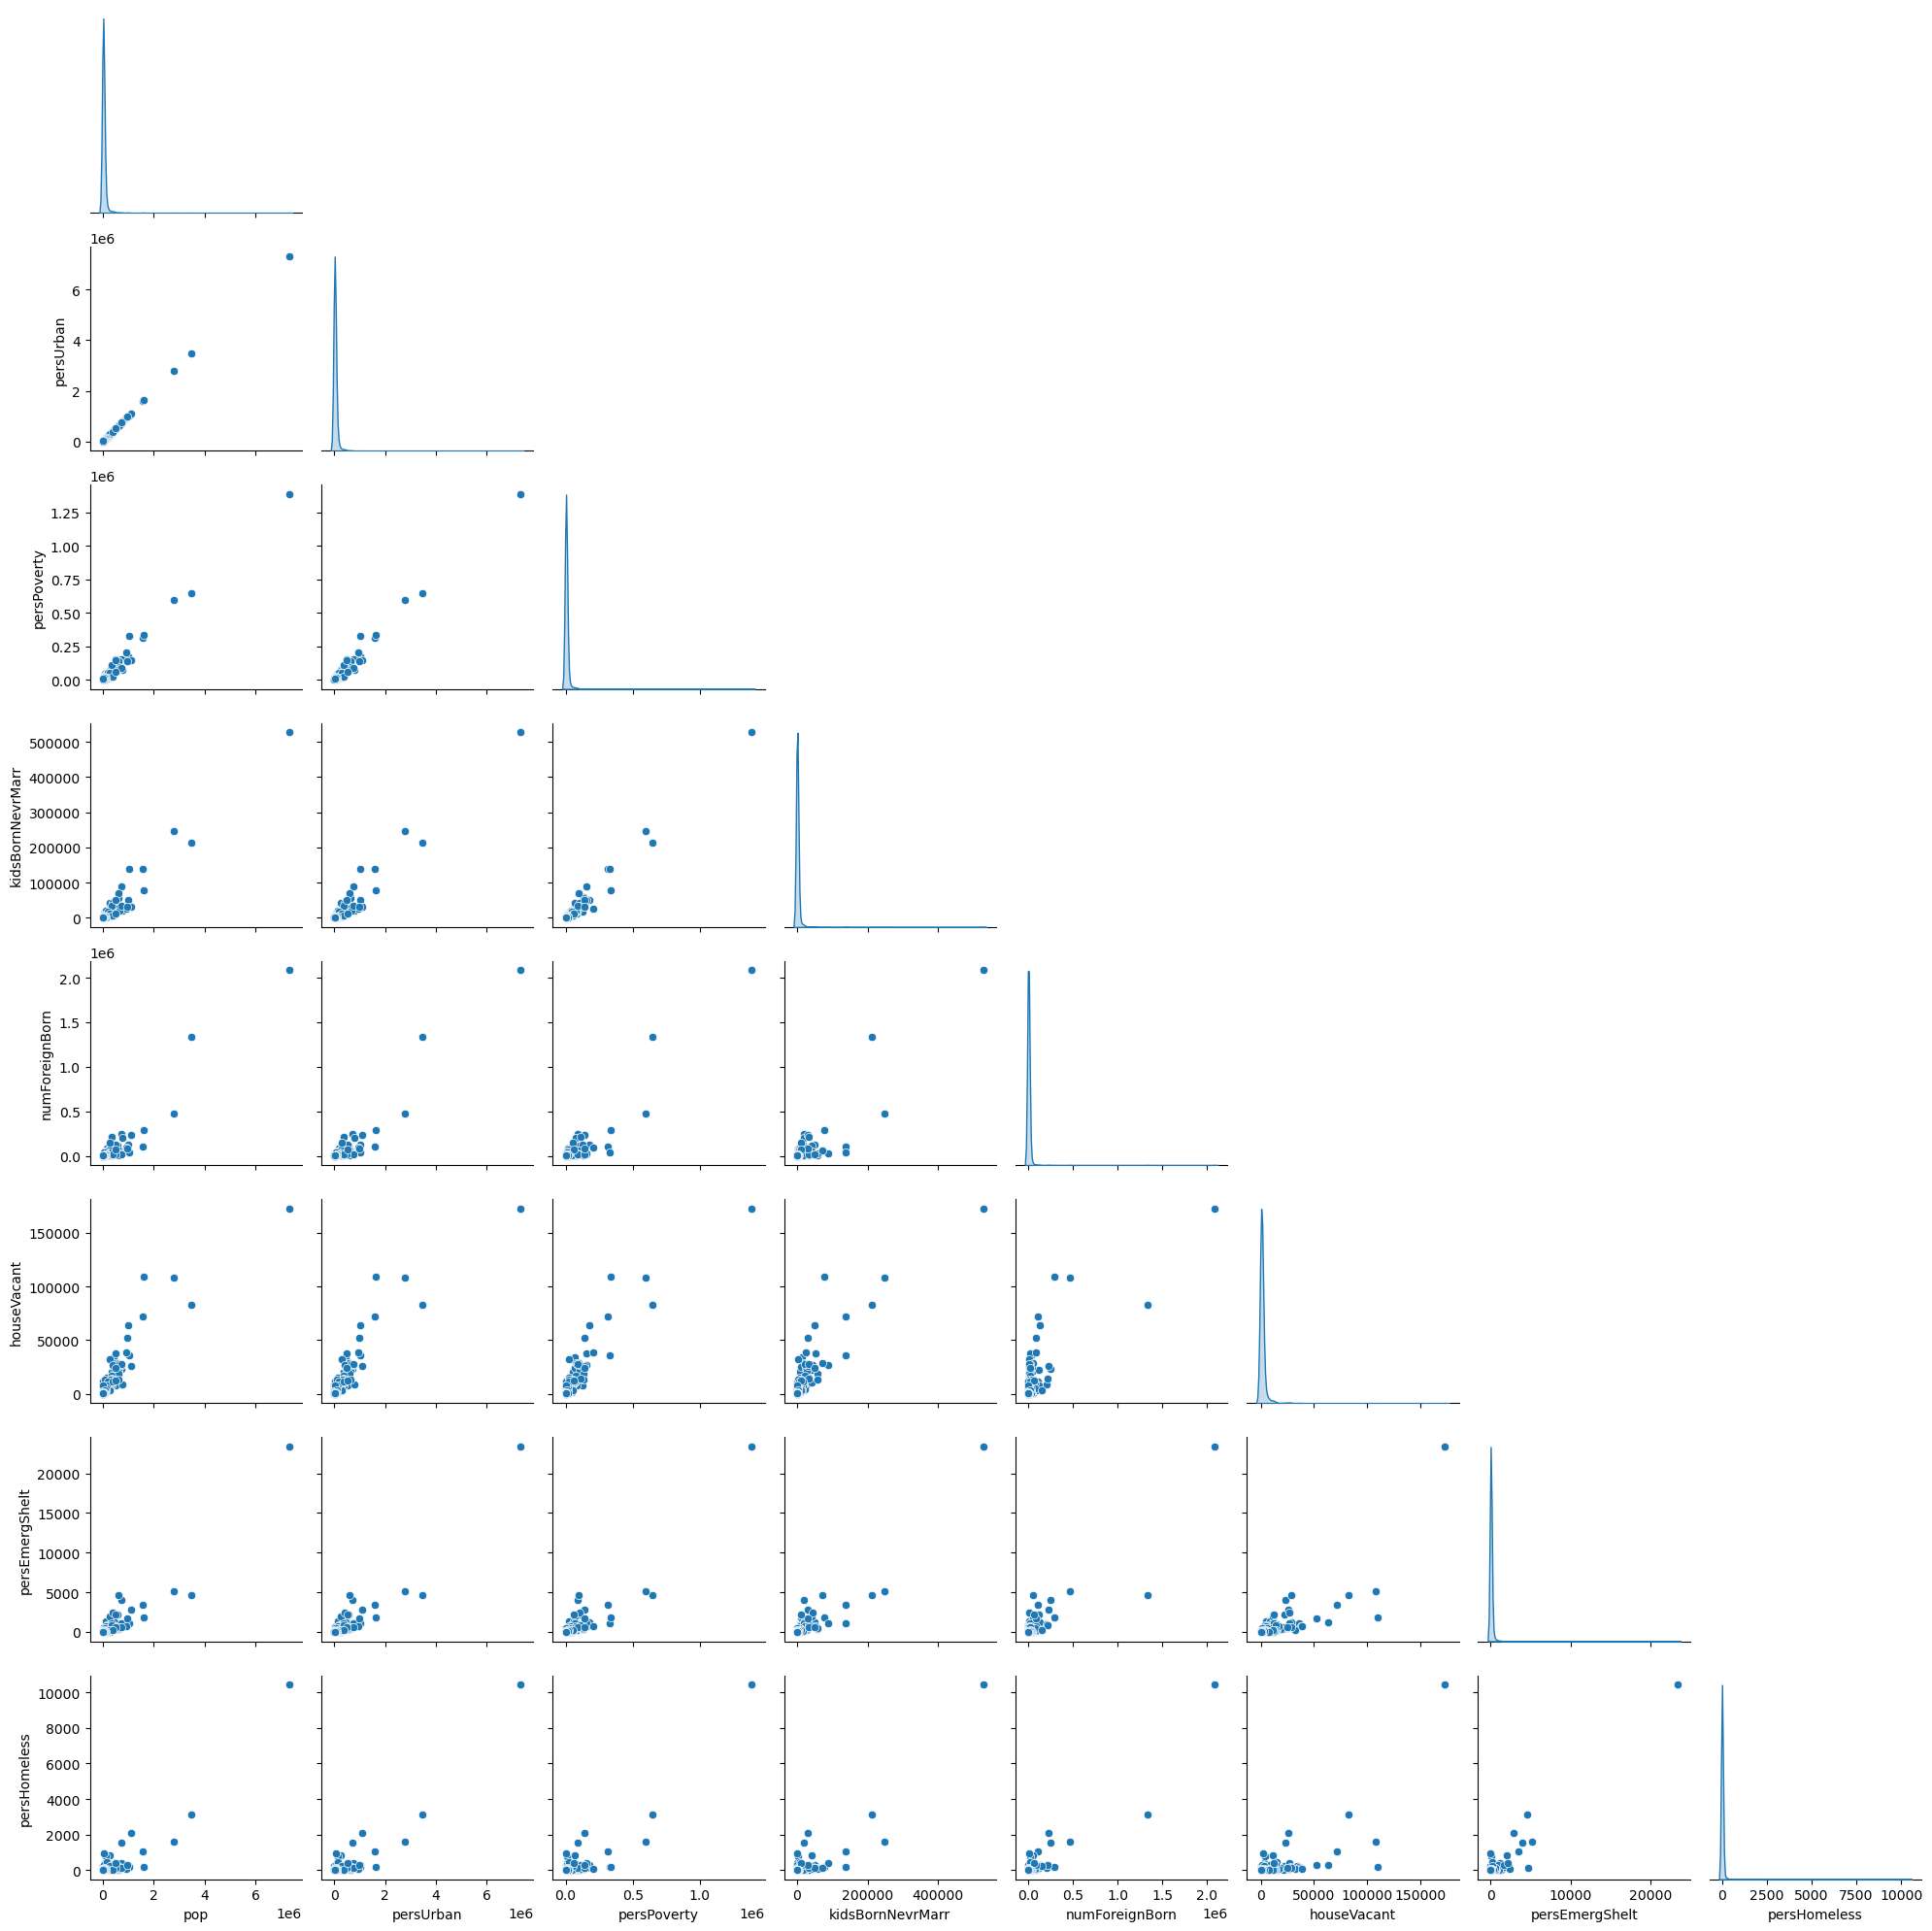

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the selected features
select_features = [
    'pop',
    'persUrban',
    'persPoverty',
    'kidsBornNevrMarr',
    'numForeignBorn',
    'houseVacant',
    'persEmergShelt',
    'persHomeless'
]

# Ensure `df_features_cleaned` contains the selected features
if all(feature in df_features_cleaned.columns for feature in select_features):
    # Create a pairplot
    pairplot = sns.pairplot(df_features_cleaned[select_features], diag_kind="kde", corner=True)
    
    # Adjust layout for better visibility
    plt.tight_layout()
    plt.show()
else:
    print("Some selected features are not in the dataset. Please verify the feature names.")


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

select_features = [
    'pop',
    'persUrban',
    'persPoverty',
    'kidsBornNevrMarr',
    'numForeignBorn',
    'houseVacant',
    'persEmergShelt',
    'persHomeless'
]


try:
    # Compute the correlation matrix for the selected features
    correlation_matrix = df_features_cleaned[selected_features].corr()

    # Plot the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Correlation Matrix for Selected Features", fontsize=16)
    plt.show()
except NameError as e:
    print("Error:", e)
    print("Please ensure the dataset `df_features_cleaned` is loaded and contains the selected features.")


Error: name 'selected_features' is not defined
Please ensure the dataset `df_features_cleaned` is loaded and contains the selected features.


# Correlation Matrix Summary

- **Strong Positive Correlations**:
  - Features like `pct2Par`, `pctKids2Par`, `pctKids-4w2Par`, and `pct12-17w2Par` are highly correlated (>0.9), indicating redundancy in family structure metrics.

- **Strong Negative Correlations**:
  - `pctKidsBornNevrMarr` shows strong negative correlations (~-0.85) with features like `pct2Par` and `pctKids2Par`, suggesting an inverse relationship with two-parent household metrics.

- **Moderate Correlations**:
  - `pctWhite` is moderately correlated with both family structure metrics (~0.7) and `pctKidsBornNevrMarr` (~-0.8), highlighting potential demographic trends.

### Recommendation:
- Address multicollinearity by applying **dimensionality reduction** (e.g., PCA) or **feature selection** to improve model performance.



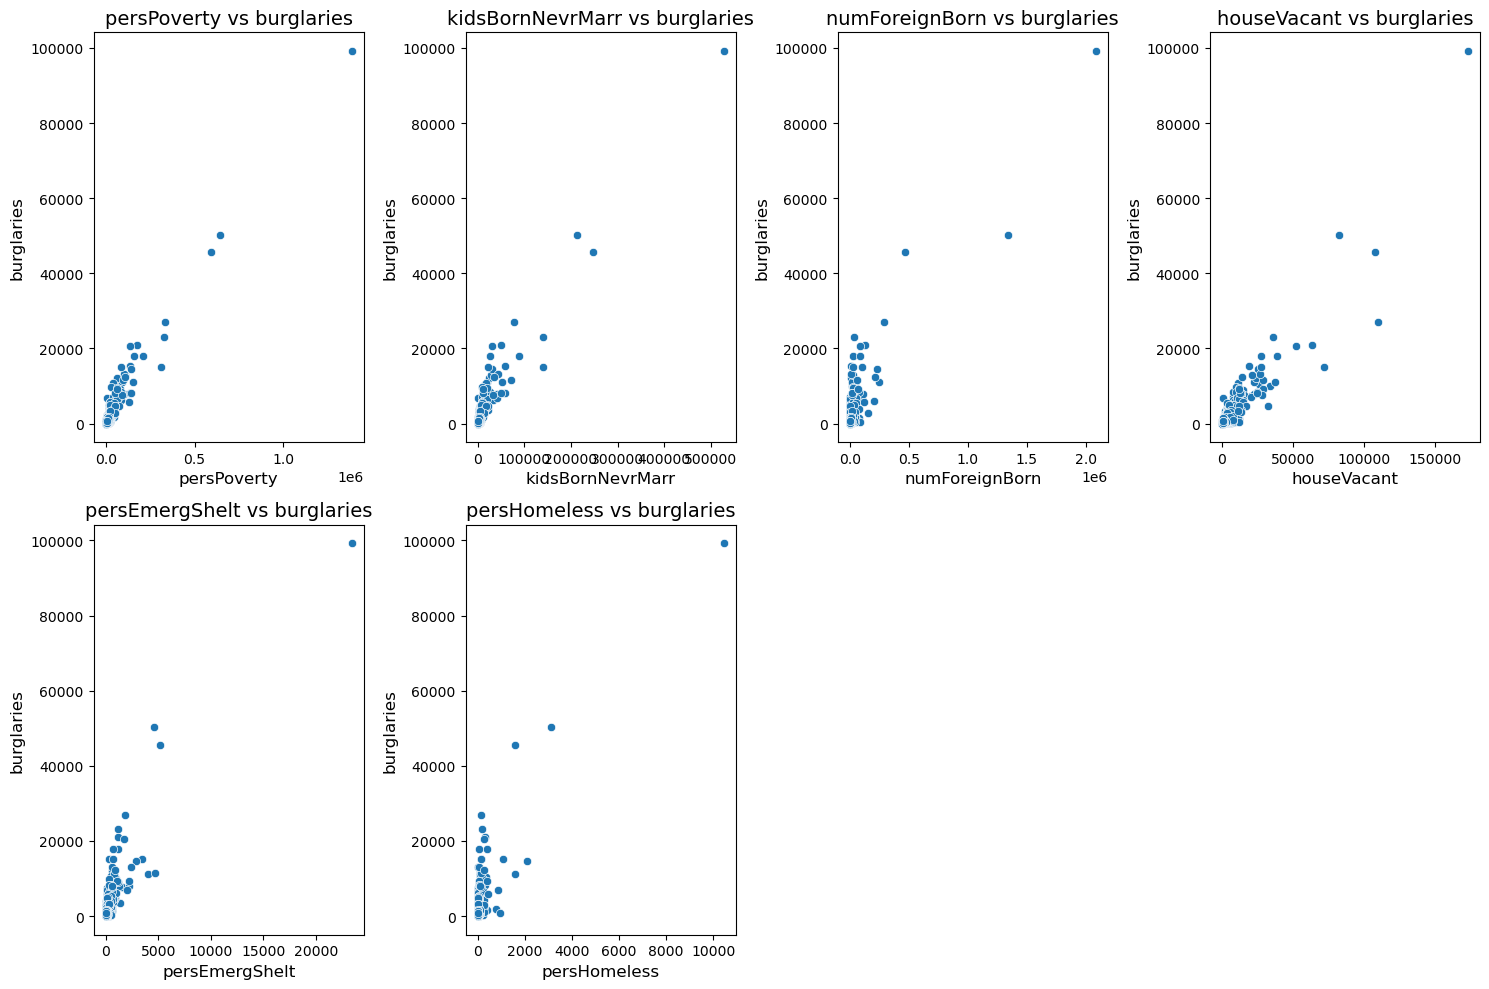

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


selected_features = [
    'persPoverty',
    'kidsBornNevrMarr',
    'numForeignBorn',
    'houseVacant',
    'persEmergShelt',
    'persHomeless'
]

target = 'burglaries'

# Set up the figure and axes
n_features = len(selected_features)
n_cols = 4  # Number of columns in the subplot grid
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate rows needed to fit all features

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))  # Adjust figure size

# Flatten axes for easy indexing
axes = axes.flatten()

# Iterate over features and create scatter plots using sns
for i, feature in enumerate(selected_features):
    if feature in df_features_cleaned.columns:
        sns.scatterplot(
            x=df_features_cleaned[feature],
            y=df_targets[target],
            ax=axes[i]
        )
        axes[i].set_title(f"{feature} vs {target}", fontsize=14)
        axes[i].set_xlabel(feature, fontsize=12)
        axes[i].set_ylabel(target, fontsize=12)
    else:
        axes[i].text(0.5, 0.5, "Feature not found", 
                     fontsize=12, ha='center', va='center')
        axes[i].set_title(f"{feature} (Error)", fontsize=14)

# Remove any unused subplots
for j in range(len(selected_features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig('scatter_plots.png', dpi=300)

# Show the plot
plt.show()


C:\Users\hyz20\AppData\Local\Temp\ipykernel_7612\1565295081.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[target] = df_targets[target]  # Add target column to the dataframe


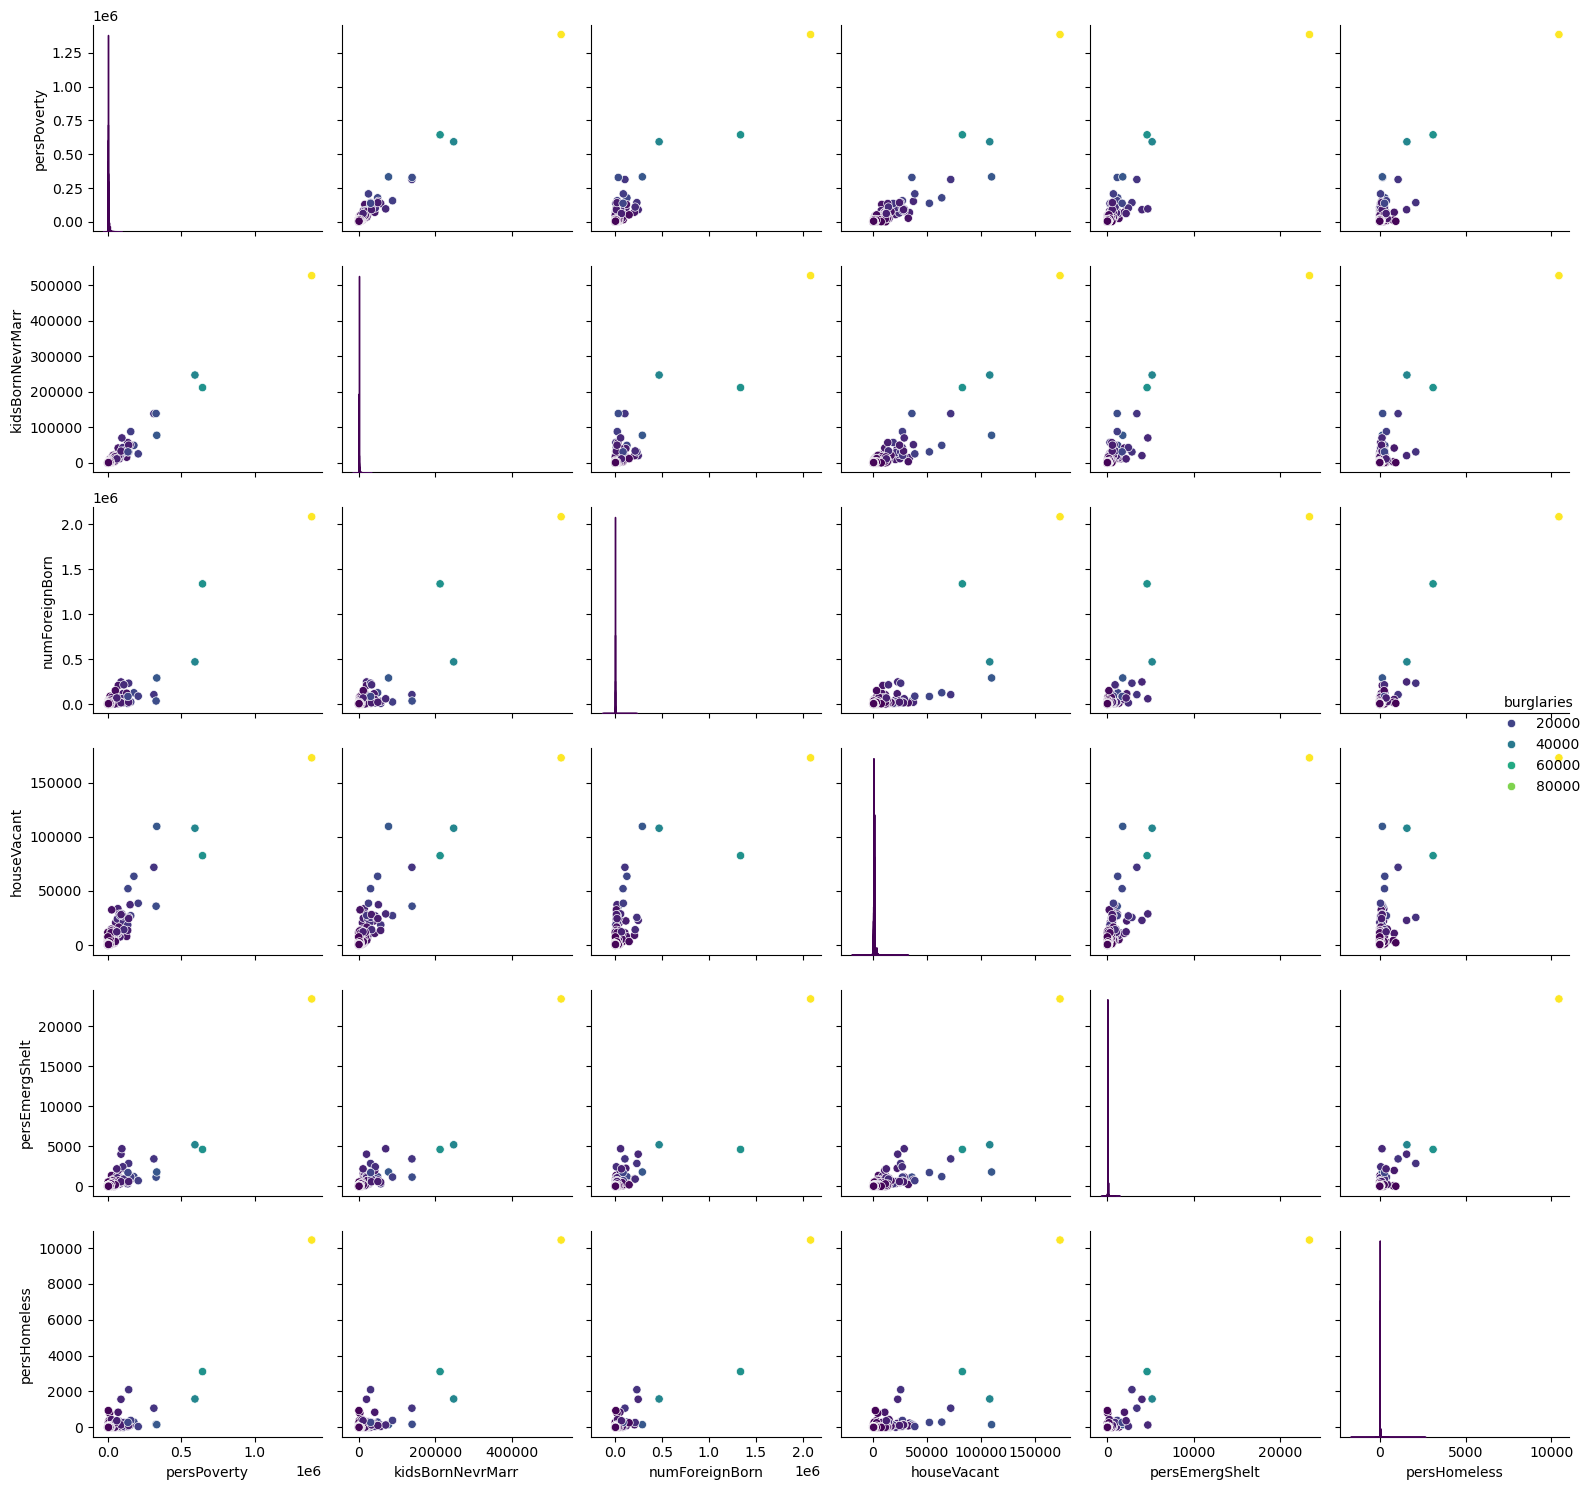

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the selected features
selected_features = [
    'persPoverty',
    'kidsBornNevrMarr',
    'numForeignBorn',
    'houseVacant',
    'persEmergShelt',
    'persHomeless'
]
target = 'burglaries'
# Ensure you select the target variable as well for hue
df_selected = df_features_cleaned[selected_features]
df_selected[target] = df_targets[target]  # Add target column to the dataframe

# Create the pairplot with hue based on the target variable
sns.pairplot(df_selected, hue=target, palette='viridis', diag_kind='kde')

# Show the plot
plt.tight_layout()
plt.show()


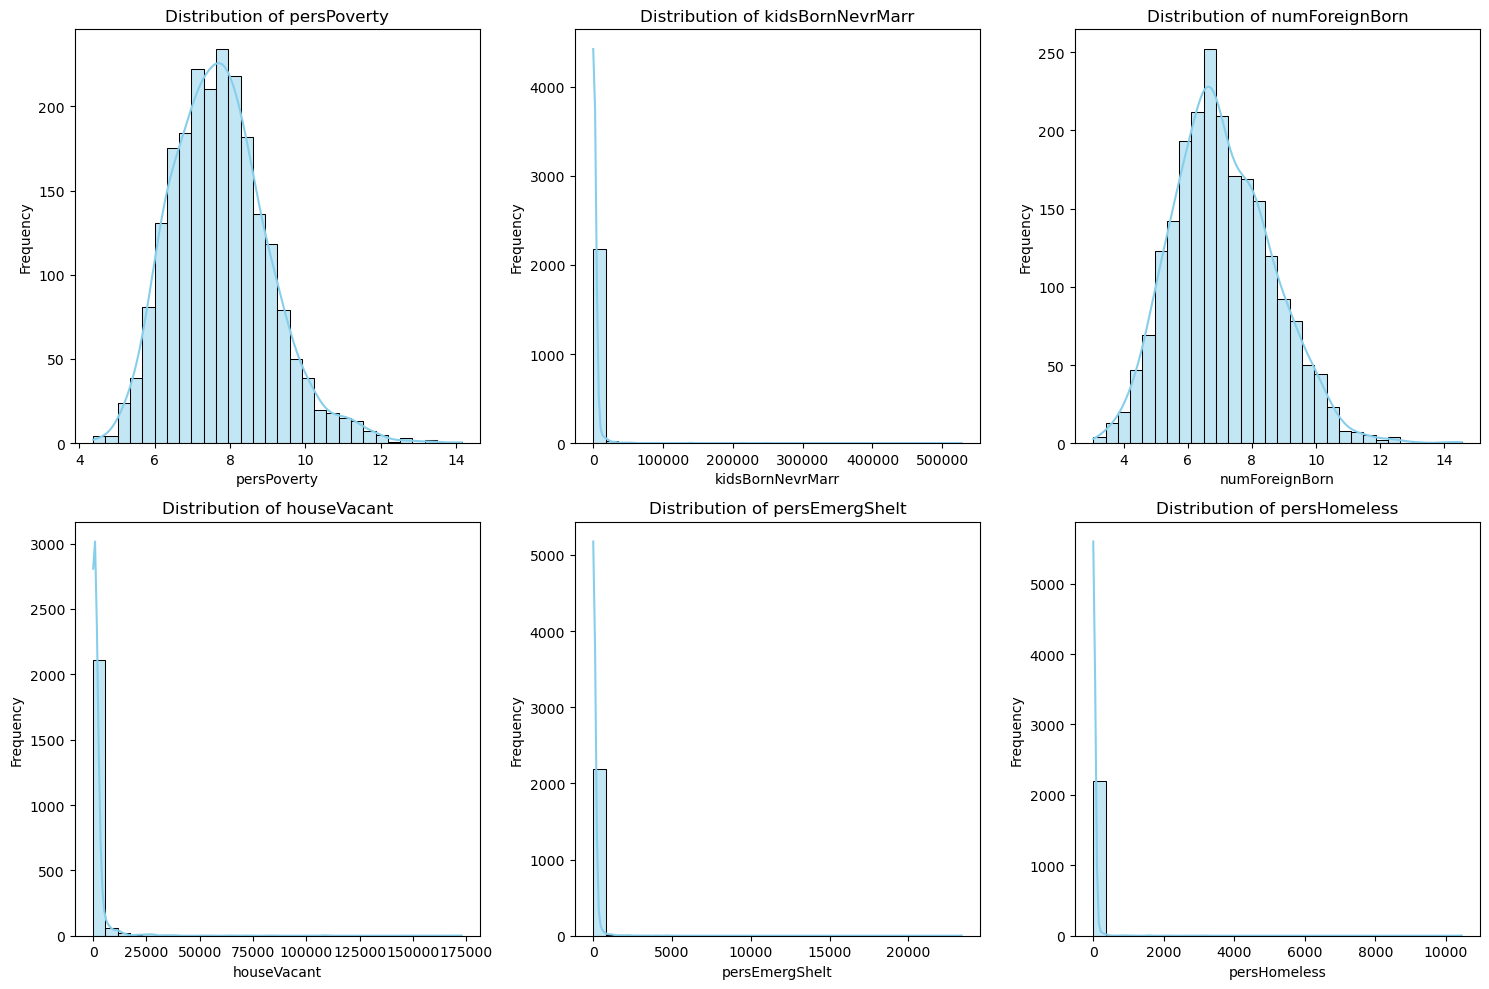

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your selected features
selected_features = [
    'persPoverty',
    'kidsBornNevrMarr',
    'numForeignBorn',
    'houseVacant',
    'persEmergShelt',
    'persHomeless'
]

# Select only numerical columns from the selected features
numerical_selected_features = df[selected_features]

# Determine the number of rows needed (for 3 columns per row)
n_rows = len(selected_features) // 3 + (len(selected_features) % 3 > 0)

# Create subplots with 3 columns per row
fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 5))

# Flatten the axes array to iterate over it easily
axes = axes.flatten()

# Plot histogram and KDE for each selected numerical feature
for i, column in enumerate(numerical_selected_features.columns):
    sns.histplot(df[column], kde=True, bins=30, color='skyblue', edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any empty subplots (if the number of features isn't a multiple of 3)
for i in range(len(numerical_selected_features.columns), len(axes)):
    axes[i].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


C:\Users\hyz20\AppData\Local\Temp\ipykernel_7612\525490335.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_selected[feature], palette='viridis')
C:\Users\hyz20\AppData\Local\Temp\ipykernel_7612\525490335.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_selected[feature], palette='viridis')
C:\Users\hyz20\AppData\Local\Temp\ipykernel_7612\525490335.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_selected[feature], palette='viridis')
C:\Users\hyz20\AppData\Local\Temp\ipykernel_7612\525490335.py:23: FutureWarning: 


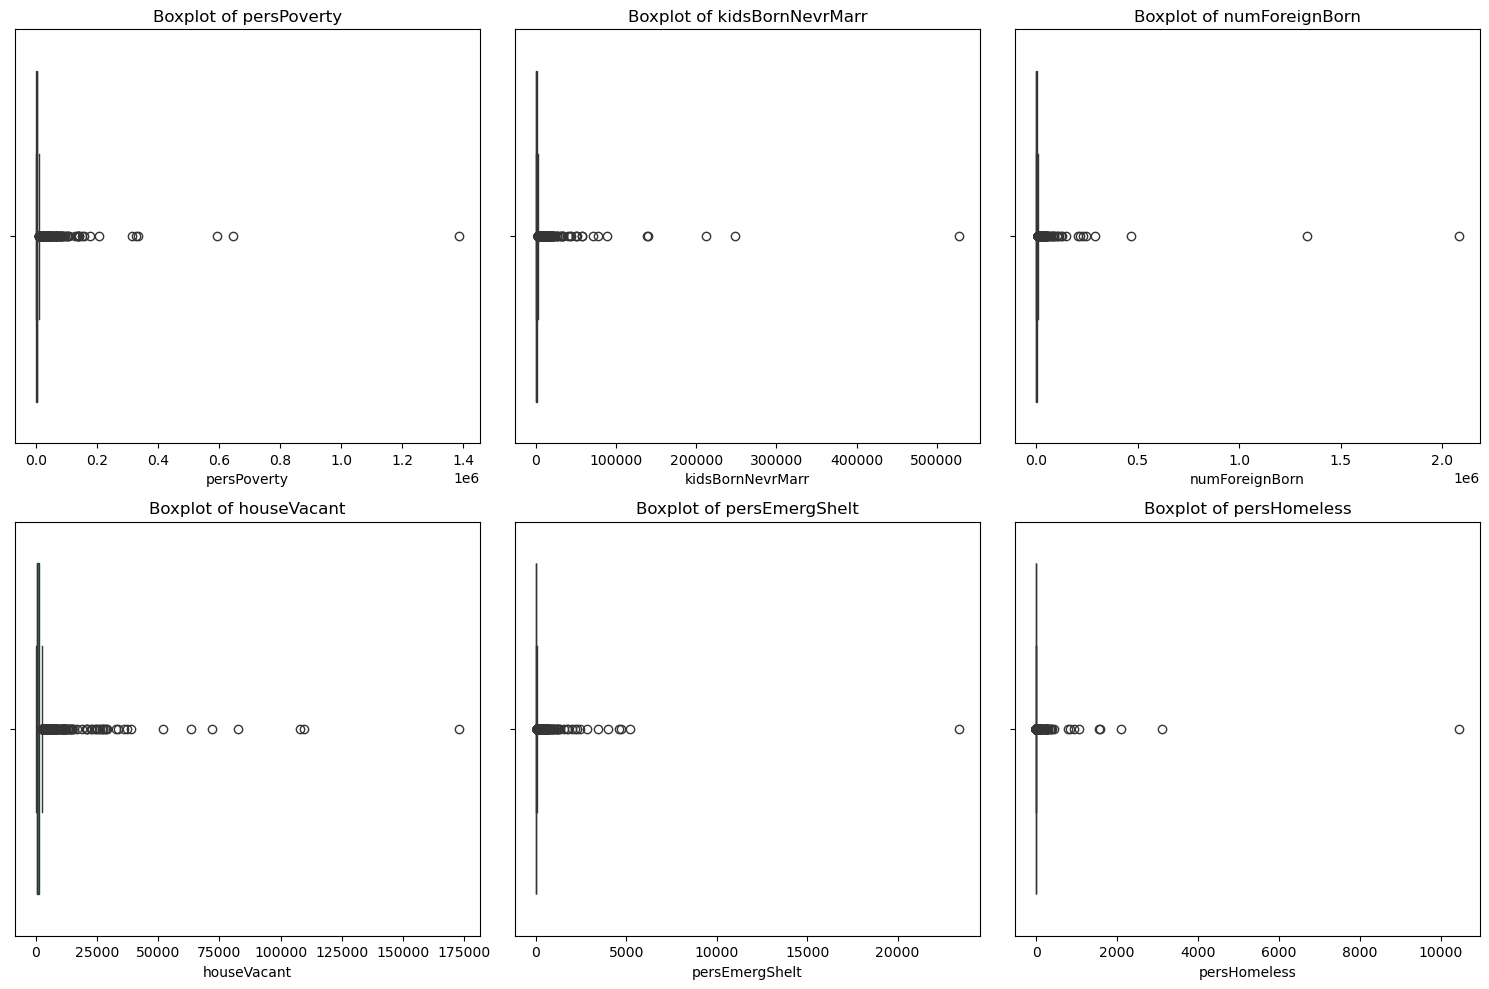

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the selected features
selected_features = [
    'persPoverty',
    'kidsBornNevrMarr',
    'numForeignBorn',
    'houseVacant',
    'persEmergShelt',
    'persHomeless'
]

# Ensure the dataframe only contains the selected features
df_selected = df_features_cleaned[selected_features]

# Create boxplots for each selected feature
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed

# Loop through each feature and create a boxplot
for i, feature in enumerate(selected_features):
    plt.subplot(2, 3, i + 1)  # Arrange in a 2x3 grid of plots
    sns.boxplot(x=df_selected[feature], palette='viridis')
    plt.title(f'Boxplot of {feature}')

# Adjust layout for clarity
plt.tight_layout()
plt.show()


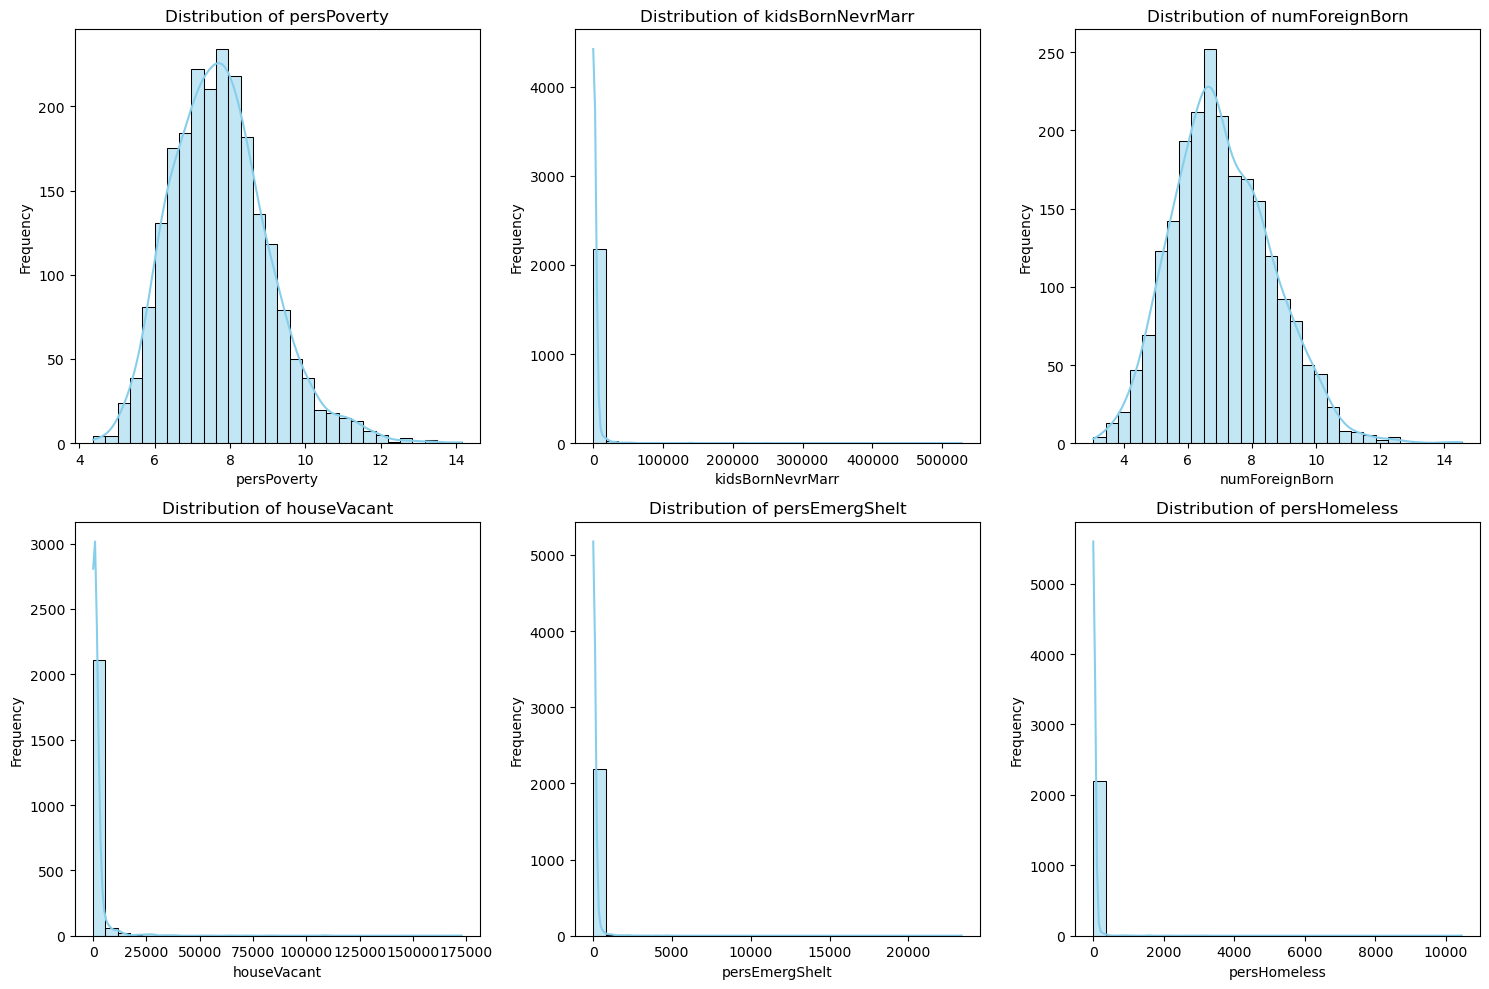

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your selected features
selected_features = [
    'persPoverty',
    'kidsBornNevrMarr',
    'numForeignBorn',
    'houseVacant',
    'persEmergShelt',
    'persHomeless'
]

# Select only numerical columns from the selected features
numerical_selected_features = df[selected_features]

# Determine the number of rows needed (for 3 columns per row)
n_rows = len(selected_features) // 3 + (len(selected_features) % 3 > 0)

# Create subplots with 3 columns per row
fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 5))

# Flatten the axes array to iterate over it easily
axes = axes.flatten()

# Plot histogram and KDE for each selected numerical feature
for i, column in enumerate(numerical_selected_features.columns):
    sns.histplot(df[column], kde=True, bins=30, color='skyblue', edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any empty subplots (if the number of features isn't a multiple of 3)
for i in range(len(numerical_selected_features.columns), len(axes)):
    axes[i].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('feature_distribution.png', dpi=300)
plt.show()


# Feature Scaling and Normalization

From the feature plots, we can observe that the **feature scale ranges vary significantly**. To address this, we need to apply **Min-Max Scaling** or **StandardScaler** to normalize the data. 

Normalization is crucial for **scale-sensitive algorithms** such as:

- **KNN (k-nearest neighbors)**
- **SVM (Support Vector Machines)**
- **Linear Regression**
- **Advanced learning algorithms like deep learning (e.g., neural networks)**

This ensures all features contribute equally, improving model performance and convergence.


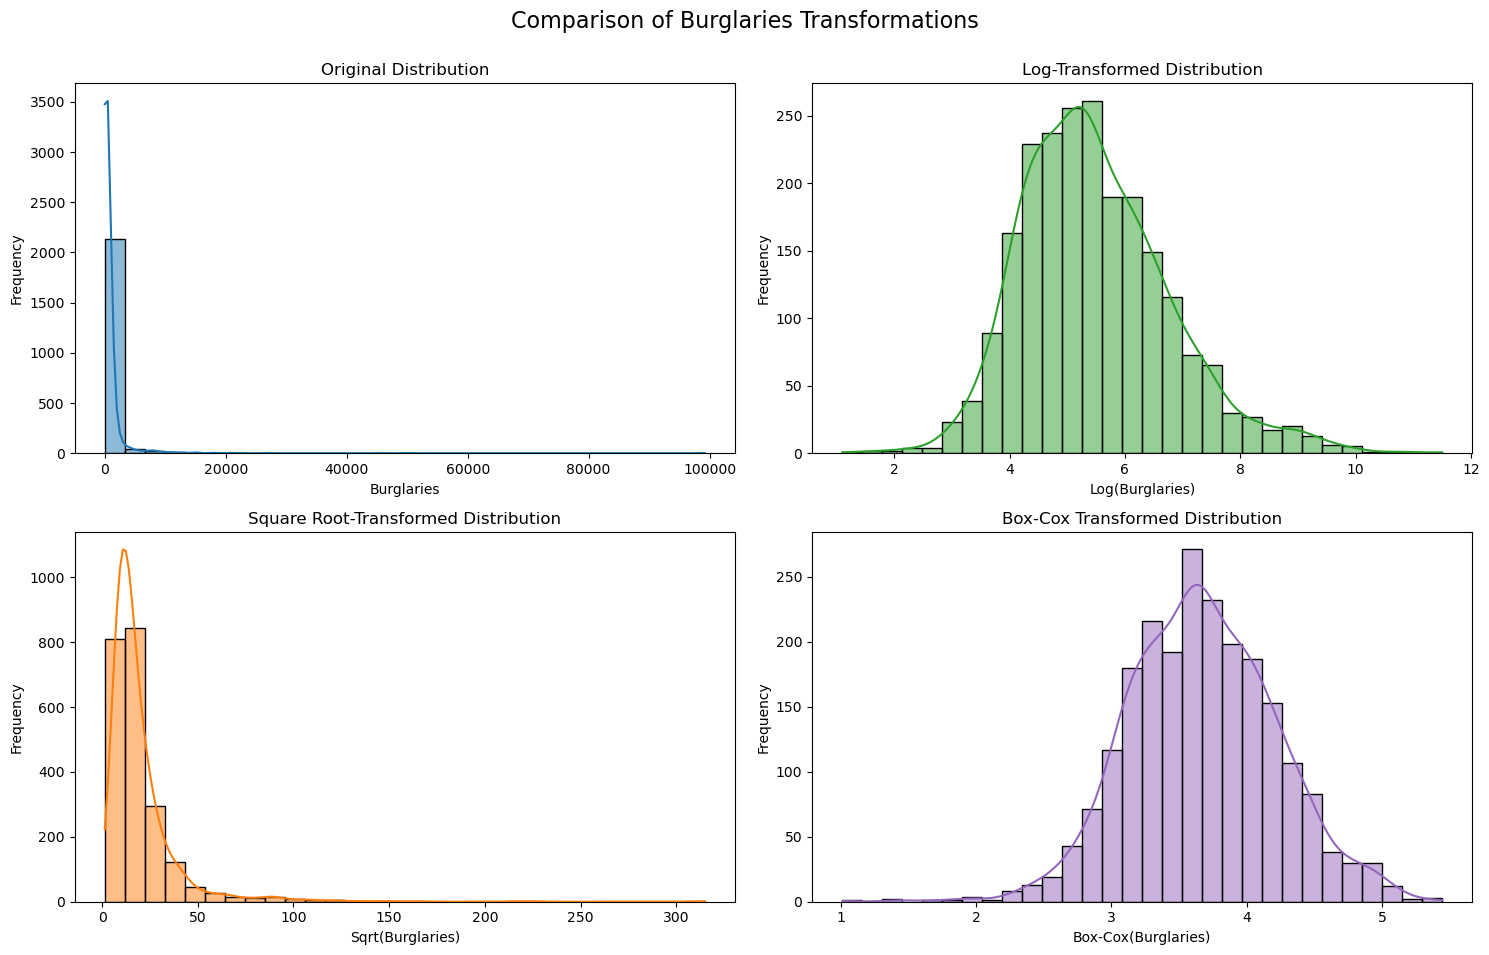

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

# Apply transformations to the target variable
original = df_targets['burglaries']
log_transformed = np.log1p(original)  # Log transformation (log(1 + x) to handle zeroes)
sqrt_transformed = np.sqrt(original)  # Square root transformation
boxcox_transformed, _ = scipy.stats.boxcox(original + 1)  # Box-Cox requires positive values

# Define conference paper-friendly colors
colors = {
    'original': '#1f77b4',  # Blue (for original)
    'log': '#2ca02c',       # Green (for log-transformed)
    'sqrt': '#ff7f0e',      # Orange (for sqrt-transformed)
    'boxcox': '#9467bd'     # Purple (for box-cox transformed)
}

# Create subplots to compare transformations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Comparison of Burglaries Transformations", fontsize=16, y=0.95)

# Original distribution
sns.histplot(original, kde=True, color=colors['original'], ax=axes[0, 0], bins=30, edgecolor='black')
axes[0, 0].set_title('Original Distribution')
axes[0, 0].set_xlabel('Burglaries')
axes[0, 0].set_ylabel('Frequency')

# Log-transformed distribution
sns.histplot(log_transformed, kde=True, color=colors['log'], ax=axes[0, 1], bins=30, edgecolor='black')
axes[0, 1].set_title('Log-Transformed Distribution')
axes[0, 1].set_xlabel('Log(Burglaries)')
axes[0, 1].set_ylabel('Frequency')

# Square root-transformed distribution
sns.histplot(sqrt_transformed, kde=True, color=colors['sqrt'], ax=axes[1, 0], bins=30, edgecolor='black')
axes[1, 0].set_title('Square Root-Transformed Distribution')
axes[1, 0].set_xlabel('Sqrt(Burglaries)')
axes[1, 0].set_ylabel('Frequency')

# Box-Cox transformed distribution
sns.histplot(boxcox_transformed, kde=True, color=colors['boxcox'], ax=axes[1, 1], bins=30, edgecolor='black')
axes[1, 1].set_title('Box-Cox Transformed Distribution')
axes[1, 1].set_xlabel('Box-Cox(Burglaries)')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the main title
plt.savefig('transformation.png', dpi=300)
plt.show()


## The target variable is highly skewed, which can negatively affect the performance of machine learning models. To address this, two effective transformations can be applied: log transformation and box-cox transformation